# BANK APP REVIEWS - BOA

In [1]:
#auto loading
%load_ext autoreload
%autoreload 2

## 🧱 1. Setup & Imports

In [2]:
import warnings
import pandas as pd
from data.data_quality_utils import DataQualityUtils
from data.load_data import load_local_data
from visualization.visualizer import ReviewVisualizer

In [3]:
warnings.filterwarnings("ignore")

In [4]:
# variable
BANK="BOA"

In [5]:
#paths
RAW_DATA_PATH='../../data/raw/'+BANK+'_raw_reviews.csv'
CLEANED_DATA_PATH='../../data/interim/'+BANK+'_cleaned_reviews.csv'

## 📦 2. Data Loading & Overview  <a id= '2-data-loading--overview'></a>

In [6]:
# Load the stock news sentiment data
df = load_local_data(RAW_DATA_PATH,)
df.head()

INFO:data.load_data:Loading data from: /home/teshager/Documents/10Academy/repositories/projects/customer-experience-analytics-for-fintech-apps/data/raw/BOA_raw_reviews.csv (type=csv)
INFO:data.load_data:Data loaded successfully. Shape: (1000, 10)


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,937102c6-ae88-419c-994b-80e520faacb8,Phillmon Haftom,https://play-lh.googleusercontent.com/a/ACg8oc...,it's not working,3,0,25.05.03,2025-06-05 11:57:36,NaN,NaN
1,3559b91c-fad9-4032-bebe-cf99974b9628,Robel Alebachew,https://play-lh.googleusercontent.com/a/ACg8oc...,"Hello, I’m facing a problem with the BOA Mobil...",1,0,NaN,2025-06-03 16:21:34,NaN,NaN
2,10e85f30-540d-4810-ba89-85a7e004480b,Haymanot Anberber,https://play-lh.googleusercontent.com/a/ACg8oc...,exceptional,5,0,NaN,2025-06-03 10:32:35,NaN,NaN
3,d7f07898-4ba1-47b4-9e8c-a3cc10b1bf0f,Mohamed Abdillahi,https://play-lh.googleusercontent.com/a-/ALV-U...,BoA Mobile good bank,5,0,25.05.03,2025-06-02 14:25:12,NaN,NaN
4,2ca9480b-ff5f-4b59-952c-5921db83dab2,Ahadu tech,https://play-lh.googleusercontent.com/a-/ALV-U...,this is worest app 24/7 loading,1,0,25.05.03,2025-06-01 15:51:10,NaN,NaN


### Dataset Overview

In [7]:
#view sample data
df.sample(10)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
994,737fc8d2-f0d5-4f60-9b45-fdd2a3ad0f16,Abay Technology and Logistics Solution PLC,https://play-lh.googleusercontent.com/a/ACg8oc...,Well done,5,2,NaN,2024-02-03 21:50:56,NaN,NaN
806,bd509db9-9cea-4b04-8776-6aaad5914a84,Estifanos Hailu,https://play-lh.googleusercontent.com/a-/ALV-U...,The app is not showing my balance or any trans...,1,1,24.02.07,2024-04-13 17:21:44,NaN,NaN
610,4fef53fb-1b5d-4262-b097-1436650e85b4,Abel Girma,https://play-lh.googleusercontent.com/a/ACg8oc...,I prefer the earlier version. This updated app...,4,18,24.04.26,2024-05-03 18:19:24,NaN,NaN
316,b9ddd42d-164a-41e5-b5cd-55dd14cfbd8c,Yonas Desalegn,https://play-lh.googleusercontent.com/a-/ALV-U...,Mostly not working 😑,1,0,24.07.04,2024-08-14 12:29:24,NaN,NaN
94,12f08f68-da19-4974-8086-304a40091d72,Mahlet Fassil,https://play-lh.googleusercontent.com/a/ACg8oc...,Very poor proformance,1,0,24.11.22,2025-03-01 23:02:44,NaN,NaN
921,248376cc-09ca-4121-92f9-f1502ecf7de2,babi yalem,https://play-lh.googleusercontent.com/a-/ALV-U...,It was good and more secured mb app but this n...,5,3,24.02.07,2024-02-19 07:58:40,NaN,NaN
953,a3f239e6-b1c6-4910-8d4d-5db544802d31,muna bayou,https://play-lh.googleusercontent.com/a-/ALV-U...,"The app does not work well from abroad, there ...",1,75,24.02.07,2024-02-12 16:10:57,NaN,NaN
384,01c3d316-3dbc-4e5c-9a71-8ed4fecc7233,Aymen Seid,https://play-lh.googleusercontent.com/a/ACg8oc...,"screenshot isn't working, Please modify it",2,0,24.07.04,2024-07-22 17:38:15,NaN,NaN
267,c33b61e9-53db-4349-9ffb-a0d8a5a59051,Ermiyas Argaw,https://play-lh.googleusercontent.com/a-/ALV-U...,How many hours should I wait after transferrin...,1,0,24.07.04,2024-09-15 20:36:11,NaN,NaN
643,a31479ac-6324-4757-8381-6b40cebbde69,SHABEELLE GROUP,https://play-lh.googleusercontent.com/a/ACg8oc...,best,5,1,NaN,2024-05-02 12:35:04,NaN,NaN


In [8]:
#see the last rows
df.tail()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
995,7e629e12-154b-4482-a805-90bf721f5011,Sha net,https://play-lh.googleusercontent.com/a/ACg8oc...,I don't have words for your great work.. Reall...,5,30,24.01.09,2024-02-03 19:07:15,NaN,NaN
996,832b30a2-1ab9-476f-838d-e96b1f50da03,Abebayehu mussa,https://play-lh.googleusercontent.com/a-/ALV-U...,Nice,5,2,24.01.09,2024-02-03 16:46:47,NaN,NaN
997,000ef73f-978b-4c50-a44a-9c57cbc5c69e,ww,https://play-lh.googleusercontent.com/a/ACg8oc...,A massive improvement from the previous app. M...,5,6,24.01.09,2024-02-03 13:04:16,NaN,NaN
998,a0cf0ff4-f795-42d9-ada0-e31effdbc5ab,Kassahun Berihun,https://play-lh.googleusercontent.com/a-/ALV-U...,Good,5,2,24.01.09,2024-02-03 12:47:25,NaN,NaN
999,e6c09bb3-ef33-47b7-99c3-3b6b20ea79b8,Beti Abreham,https://play-lh.googleusercontent.com/a/ACg8oc...,Boa,5,2,NaN,2024-02-03 12:24:09,NaN,NaN


In [9]:
#shape of the dataset
df.shape

(1000, 10)

In [10]:
df.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt'],
      dtype='object')

## 📐 3. Data Types & Basic Stats <a id='3-data-types--basic-stats'></a>

In [11]:
#Numerical Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
score,1000.0,3.020,1.859855,1.0,1.0,3.0,5.0,5.0
thumbsUpCount,1000.0,9.131,74.395999,0.0,0.0,1.0,1.0,1810.0


In [12]:
#for columns of object type
df.describe(include=['O']).T

,count,unique,top,freq
reviewId,1000,1000,e6c09bb3-ef33-47b7-99c3-3b6b20ea79b8,1
userName,1000,994,Kidus Yohannes,2
userImage,1000,999,https://play-lh.googleusercontent.com/a-/ALV-U...,2
content,1000,856,Good,43
reviewCreatedVersion,728,10,24.02.07,146
at,1000,1000,2024-02-03 12:24:09,1
replyContent,23,8,Thank you very much. Keep using our app,8
repliedAt,23,23,2024-02-22 15:40:34,1


In [13]:
# data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              1000 non-null   object
 1   userName              1000 non-null   object
 2   userImage             1000 non-null   object
 3   content               1000 non-null   object
 4   score                 1000 non-null   int64 
 5   thumbsUpCount         1000 non-null   int64 
 6   reviewCreatedVersion  728 non-null    object
 7   at                    1000 non-null   object
 8   replyContent          23 non-null     object
 9   repliedAt             23 non-null     object
dtypes: int64(2), object(8)
memory usage: 78.2+ KB


In [14]:
#distinct values in each column
df.nunique().sort_values(ascending=False)

reviewId                1000
at                      1000
userImage                999
userName                 994
content                  856
thumbsUpCount             53
repliedAt                 23
reviewCreatedVersion      10
replyContent               8
score                      5
dtype: int64

## 🔍 4. Data Quality Analysis <a id='4-data-quality-analysis'></a>

In [15]:
#instantiate the DataQualityUtils class
dq=DataQualityUtils(df)

In [16]:
#count of missing values per column
dq.summary()

,#missing_values,percentage
repliedAt,977,97.70%
replyContent,977,97.70%
reviewCreatedVersion,272,27.20%
reviewId,0,0.00%
userName,0,0.00%
userImage,0,0.00%
thumbsUpCount,0,0.00%
score,0,0.00%
content,0,0.00%
at,0,0.00%


### Missing Values

In [17]:
#column with >5% nulls
dq.columns_with_significant_missing_values(threshold=5)

,#missing_values,percentage
replyContent,977,97.70%
repliedAt,977,97.70%
reviewCreatedVersion,272,27.20%


### Duplicates

In [18]:
#count duplicates
dq.count_duplicates()

np.int64(0)

In [19]:
#look at the duplicates
dq.display_duplicates()

[INFO] Found 0 duplicated row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt


### Invalid Values

In [20]:
dq.find_invalid_values()

{}

## 🧹 5. Data Cleaning  <a id='5-data-cleaning'></a>

In [21]:
#saving the original dataset for later use
df_original=df.copy()

In [22]:
#drop duplicated rows
dq.drop_duplicates().sample(5)

[INFO] Dropped 0 duplicate row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
149,2e488711-7c0b-4546-b00a-bc58f90177dd,Lemuk,https://play-lh.googleusercontent.com/a-/ALV-U...,አይሰራም ሼም ነው፤,1,0,24.11.22,2024-12-23 17:03:45,NaN,NaN
595,22c234d6-4551-4e15-a32a-4deefd8ad2aa,Test Hop,https://play-lh.googleusercontent.com/a/ACg8oc...,it's good app,5,2,NaN,2024-05-04 22:43:38,NaN,NaN
804,a657aab1-f208-418f-b086-26645471127d,bile Tsegaye,https://play-lh.googleusercontent.com/a-/ALV-U...,The best,4,3,24.02.07,2024-04-14 06:58:13,NaN,NaN
122,bd70c04c-b85f-47ac-b1e8-db0279790bf8,Metalgn N,https://play-lh.googleusercontent.com/a/ACg8oc...,Best,5,1,24.11.22,2025-01-14 11:14:00,NaN,NaN
686,c10f6f0d-46bb-44fa-893b-c951985d5f00,sam,https://play-lh.googleusercontent.com/a-/ALV-U...,Hello is this new update cuz it keeps kicking ...,3,1,24.04.26,2024-04-30 11:37:33,NaN,NaN


In [23]:
# Check for duplicates again after dropping
dq.display_duplicates()

[INFO] Found 0 duplicated row(s).


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt


In [24]:
# Drop rows missing significant columns
dq.drop_rows_with_missing_in_columns(['content','score']).sample(5)

[INFO] Dropped 0 row(s) with missing values in columns: ['content', 'score']


,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
126,94acd1f3-c7e3-493f-9ded-b1f4186ac41b,Osman Ahmed,https://play-lh.googleusercontent.com/a/ACg8oc...,Thank you,5,1,24.11.22,2025-01-10 19:24:54,NaN,NaN
865,4407f54a-0d93-44b2-87be-59268512ee0e,Ade Jon,https://play-lh.googleusercontent.com/a-/ALV-U...,Waw,1,0,24.02.07,2024-03-08 16:10:02,NaN,NaN
333,7e4a7ccf-64df-4cbe-9a5b-f92e188de048,Kadija Kamal,https://play-lh.googleusercontent.com/a/ACg8oc...,Gamebela,1,0,NaN,2024-08-08 15:07:21,NaN,NaN
390,847c4660-1018-4794-9e36-4b361438b6fd,Zemen Kebede,https://play-lh.googleusercontent.com/a/ACg8oc...,Wow,5,1,NaN,2024-07-19 16:21:51,NaN,NaN
59,e52a6ccb-dc16-472c-84ef-2969c08a9318,Nahom Tesfamikael,https://play-lh.googleusercontent.com/a-/ALV-U...,"It can't actively on initialization, it says i...",1,4,25.03.07,2025-03-29 14:29:38,NaN,NaN


In [25]:
#drop columns with no data
df=dq.drop_empty_columns()

[INFO] No completely empty columns found.


In [26]:
dq.columns_with_significant_missing_values(threshold=5)

,#missing_values,percentage
replyContent,977,97.70%
repliedAt,977,97.70%
reviewCreatedVersion,272,27.20%


In [27]:
#drop the reviewid column - it is not useful for analysis
df = dq.drop_columns(['reviewId','userImage','reviewCreatedVersion','replyContent','repliedAt'])

[INFO] Dropped columns: ['reviewId', 'userImage', 'reviewCreatedVersion', 'replyContent', 'repliedAt']


In [28]:
dq.find_invalid_values()

{}

In [29]:
df=dq.replace_emojis_with_text("content")

[INFO] Replaced emojis with text equivalents in 'content' column.


In [30]:
# df=await dq.translate_non_english_text("content")

In [31]:
df.shape

(1000, 5)

In [32]:
df=dq.filter_english_text("content")

[INFO] Dropped 364 non-English rows from 'content' column.


### Inconsistencies and Inaccuracies

In [33]:
#drop redundancies and clean column names
df=dq.drop_redundant_columns()

In [34]:
df=dq.convert_columns_to_datetime()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 636 entries, 1 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   userName       636 non-null    object
 1   content        636 non-null    object
 2   score          636 non-null    int64 
 3   thumbsUpCount  636 non-null    int64 
 4   at             636 non-null    object
dtypes: int64(2), object(3)
memory usage: 29.8+ KB


In [36]:
df.columns

Index(['userName', 'content', 'score', 'thumbsUpCount', 'at'], dtype='object')

In [37]:
#  df=df.rename(columns={"content": "review", "score": "rating", "at": "date"}, inplace=True)
df=dq.rename_and_prioritize_columns({"content": "review", "score": "rating", "at": "date"})

[INFO] Renamed columns: {'content': 'review', 'score': 'rating', 'at': 'date'}


In [38]:
df["bank"] = BANK  # add bank name column
df["source"] = "Google Store"  # add source column

In [39]:
df.sample(10)

,review,rating,date,userName,thumbsUpCount,bank,source
804,The best,4,2024-04-14 06:58:13,bile Tsegaye,3,BOA,Google Store
113,I can't dijitalize my atm in the apollo app on...,1,2025-01-22 06:05:22,Mohammed Duri,1,BOA,Google Store
629,Crash... glitch... crash... blame connection.....,1,2024-05-02 22:59:16,Bereket Aberra,3,BOA,Google Store
848,When writing amounts z app cannot insert decei...,3,2024-03-20 16:49:19,tilahun yihunie,4,BOA,Google Store
242,"Stop telling me what to do with my phone, BOA....",1,2024-10-04 05:55:49,Eyuel Hailu,14,BOA,Google Store
673,No feature works correctly. Its always bufferi...,2,2024-04-30 22:39:25,Mulugeta Legesse,0,BOA,Google Store
980,"Simple, fast and easy to use. I had bad experi...",5,2024-02-05 11:58:49,Hailsh Abyssinian,8,BOA,Google Store
618,"The app keeps crashign again and again, i didn...",1,2024-05-03 10:59:07,Ermias Desalegn,2,BOA,Google Store
903,It is better than before and i like it,5,2024-02-22 21:50:36,sawkem wondimu,2,BOA,Google Store
699,This new update really sucks.. Can't even get ...,1,2024-04-29 19:59:02,Asier Negassi,4,BOA,Google Store


## 6. Analyze & Visualize

In [40]:
#instantiate the ReviewVisualizer class
viz = ReviewVisualizer(df)

[INFO] Saved plot: plots/wordcloud_reviews.png


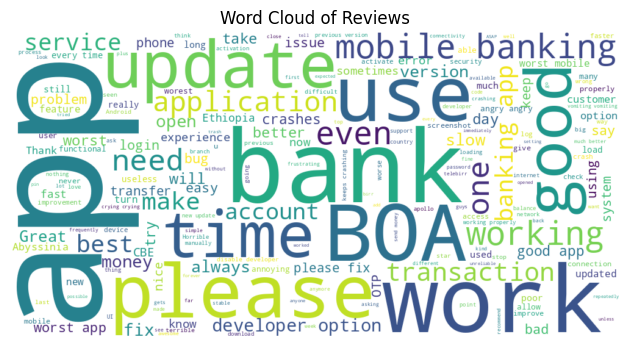

In [41]:
#Plot a word cloud of the reviews
viz.plot_wordcloud()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/rating_distribution.png


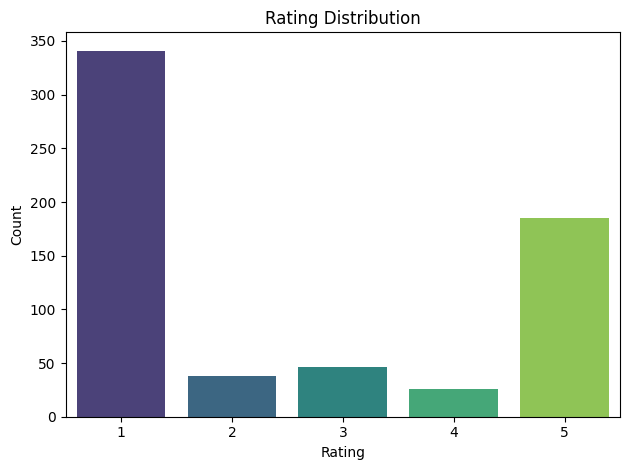

In [42]:
# Plot rating distribution
viz.plot_rating_distribution()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/thumbs_up_vs_rating.png


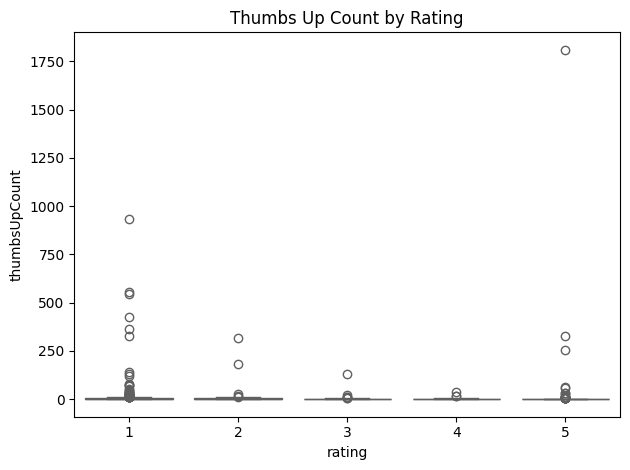

In [43]:
#Plot thumbs up against rating
viz.plot_thumbs_up_vs_rating()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


[INFO] Saved plot: plots/sentiment_vs_rating.png


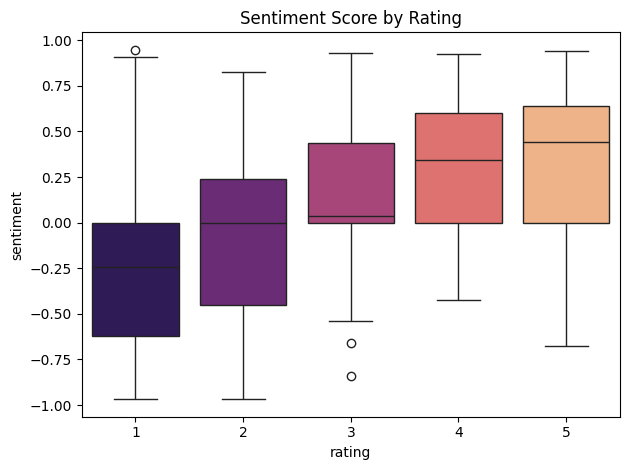

In [44]:
# Plot Sentiment against Ratin
viz.plot_sentiment_vs_rating()

In [45]:
df=dq.drop_columns(['userName','thumbsUpCount'])

[INFO] Dropped columns: ['userName', 'thumbsUpCount']


### Export Cleaned Data

In [46]:
# Save to csv
df.to_csv(CLEANED_DATA_PATH, index=False)

In [47]:
df.sample(15)

,review,rating,date,bank,source
137,It doesn't work at all.,2,2025-01-02 13:24:09,BOA,Google Store
676,Not comfortable with this version. Its hard to...,5,2024-04-30 19:29:53,BOA,Google Store
154,The forest app ever,1,2024-12-19 11:07:06,BOA,Google Store
257,It's easy used to operate program and secured,4,2024-09-25 16:00:21,BOA,Google Store
1,"Hello, I’m facing a problem with the BOA Mobil...",1,2025-06-03 16:21:34,BOA,Google Store
226,Nice to meet you my proud bank in Ethiopia.. I...,5,2024-10-18 21:22:15,BOA,Google Store
710,With every update the app keeps on getting wor...,1,2024-04-29 01:54:02,BOA,Google Store
941,Boring,1,2024-02-15 00:28:24,BOA,Google Store
902,It is easy to use and very fast app,5,2024-02-23 10:05:02,BOA,Google Store
360,this is so disappointing app disappointed,1,2024-07-31 00:37:56,BOA,Google Store
